In [81]:
import pickle
import numpy as np
from matplotlib import pyplot as plt

In [82]:
with open('embeddings_all_l0.9.pkl', 'rb') as file:
    data = pickle.load(file)

x = data["outputs"].cpu().numpy()
y = data["labels"].cpu().numpy()
print(y.shape)

(49984,)


In [83]:
embeddings = np.array(x)

In [84]:
# compute the centroid for each class
centroids = []
labels = []
for i in range(100):
    centroids.append(np.mean(embeddings[y == i], axis=0))
    labels.append(i)

print(len(centroids))
print(labels)

100
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [93]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from scipy.optimize import linear_sum_assignment

def get_even_clusters(X, cluster_size):
    n_clusters = int(np.ceil(len(X)/cluster_size))
    kmeans = KMeans(n_clusters)
    kmeans.fit(X)
    centers = kmeans.cluster_centers_
    print(kmeans.cluster_centers_.shape)
    centers = centers.reshape(-1, 1, X.shape[-1]).repeat(cluster_size, 1).reshape(-1, X.shape[-1])
    distance_matrix = cdist(X, centers)
    clusters = linear_sum_assignment(distance_matrix)[1]//cluster_size
    return clusters, kmeans.cluster_centers_

In [94]:
centroids = np.array(centroids)
print(centroids.shape)
clusters, centers = get_even_clusters(centroids, 10)

(100, 344)


/Users/sebastiancavada/anaconda3/envs/ai701/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(10, 344)


In [95]:
print(centers.shape)

(10, 344)


In [96]:
print(clusters.shape)
print(clusters)

print(np.unique(clusters, return_counts=True))

(100,)
[5 7 6 3 4 9 1 1 8 0 0 6 9 8 1 3 0 5 1 3 9 6 0 2 1 9 5 7 0 7 7 3 6 2 3 6 6
 8 3 0 0 8 3 3 7 6 6 2 8 2 4 5 2 5 1 4 5 5 8 2 2 0 1 4 4 4 4 7 2 6 1 9 4 7
 4 9 2 5 7 1 4 8 1 5 9 8 0 9 3 8 8 7 5 7 9 9 2 3 6 0]
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10]))


In [97]:
reverse = {}
for i, x in enumerate(clusters):
    reverse[i] = clusters[i]

print(reverse)

{0: 5, 1: 7, 2: 6, 3: 3, 4: 4, 5: 9, 6: 1, 7: 1, 8: 8, 9: 0, 10: 0, 11: 6, 12: 9, 13: 8, 14: 1, 15: 3, 16: 0, 17: 5, 18: 1, 19: 3, 20: 9, 21: 6, 22: 0, 23: 2, 24: 1, 25: 9, 26: 5, 27: 7, 28: 0, 29: 7, 30: 7, 31: 3, 32: 6, 33: 2, 34: 3, 35: 6, 36: 6, 37: 8, 38: 3, 39: 0, 40: 0, 41: 8, 42: 3, 43: 3, 44: 7, 45: 6, 46: 6, 47: 2, 48: 8, 49: 2, 50: 4, 51: 5, 52: 2, 53: 5, 54: 1, 55: 4, 56: 5, 57: 5, 58: 8, 59: 2, 60: 2, 61: 0, 62: 1, 63: 4, 64: 4, 65: 4, 66: 4, 67: 7, 68: 2, 69: 6, 70: 1, 71: 9, 72: 4, 73: 7, 74: 4, 75: 9, 76: 2, 77: 5, 78: 7, 79: 1, 80: 4, 81: 8, 82: 1, 83: 5, 84: 9, 85: 8, 86: 0, 87: 9, 88: 3, 89: 8, 90: 8, 91: 7, 92: 5, 93: 7, 94: 9, 95: 9, 96: 2, 97: 3, 98: 6, 99: 0}


[ 6. 20.  0.  7. 16.  8. 17. 13.  9.  4.]
0.21128761203585147


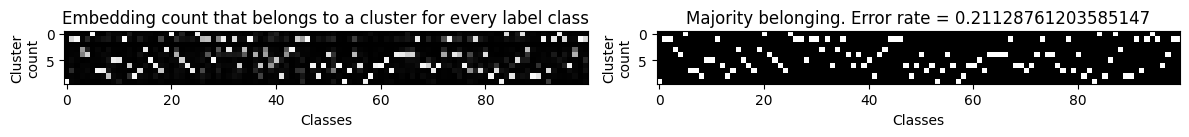

In [99]:
def plot_stuff(embeddings, y):
    # Your data and operations here
    a = np.zeros((10,100))

    for i, x in enumerate(embeddings):
        distances = np.linalg.norm(centers - x, axis=1)
        first_index = np.argsort(distances)[0]    
        a[reverse[first_index]][y[i]] += 1
        
    ## majority voting for each class
    b = np.argmax(a, axis=0)

    c = np.zeros((10,100))
    for x in range(100):    
        c[b[x]][x] = 1

    print(np.sum(c, axis=1))

    false_negative = np.ma.array(a,mask=c)
    sum_fn = np.sum(false_negative)
    print(sum_fn/y.shape[0])

    # Start by creating a figure
    plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

    # First subplot
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
    plt.xlabel("Classes")
    plt.ylabel("Cluster\ncount")
    plt.title("Embedding count that belongs to a cluster for every label class")
    plt.imshow(a, cmap='Greys_r')

    # Second subplot
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
    plt.xlabel("Classes")
    plt.ylabel("Cluster\ncount")
    plt.title("Majority belonging. Error rate = " + str(sum_fn/y.shape[0]))
    plt.imshow(c, cmap='Greys_r')

    # Display the figure
    plt.tight_layout()  # This adjusts subplots to fit into the figure area.
    plt.show()

plot_stuff(embeddings, y)

In [69]:
with open('embeddings_all_l0.9_test.pkl', 'rb') as file:
    data = pickle.load(file)

x_test = data["outputs"].cpu().numpy()
y_test = data["labels"].cpu().numpy()
print(x_test.shape)
print(y_test.shape)

embeddings_test = np.array(x_test)
y_test = np.array(y_test)

(10000, 344)
(10000,)


[10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]
0.1674


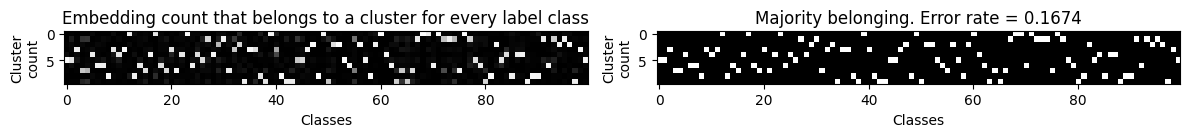

In [70]:
plot_stuff(embeddings_test, y_test)

In [71]:
print(clusters==0)

n = np.arange(100)[clusters==0]
print(n)

[False False False False False False False False False False False False
  True False False False False  True False False False False False  True
 False False False False False False False False False False False False
 False False False  True False False False False False False False False
 False  True False False False False False False False False False False
  True False False False False False False False  True  True False  True
 False False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False]
[12 17 23 39 49 60 68 69 71 76]


In [72]:
#parents_centroids = 

In [73]:
def do_it(i):

    n = np.arange(100)[clusters==i]

    embeddings_child = []
    labels_child = []

    for i, x in enumerate(embeddings_test):
        distances = np.linalg.norm(centroids - x, axis=1)
        first_index = np.argsort(distances)[0]    
        if(first_index in n):
            #print(first_index, y_test[i])
            embeddings_child.append(x)
            labels_child.append(y_test[i])

    centroids_child = []
    centroids_np = np.array(centroids)
    centroids_child = centroids_np[n]  

    curr_mapping = {}

    for i, x in enumerate(n):
        curr_mapping[x] = i

    at = np.zeros((10,11))

    for i, x in enumerate(embeddings_child):     
        distances = np.linalg.norm(centroids_child - x, axis=1)
        predicted = np.argsort(distances)[0]
        real = labels_child[i]   
       # print(real, predicted) 
        if(real not in n):
            real_mapped = 10
        else:
            real_mapped = curr_mapping[real]    

        at[predicted][real_mapped] += 1

    return at


at = do_it(2)

In [74]:
list_all = []

for i in range(10):
    at = do_it(i)
    list_all.append(at)

list_all = np.array(list_all)

226.0
717.0
975.0
1337.0
1638.0
2009.0
2320.0
2662.0
2904.0
3244.0
final test accuracy:  0.6756


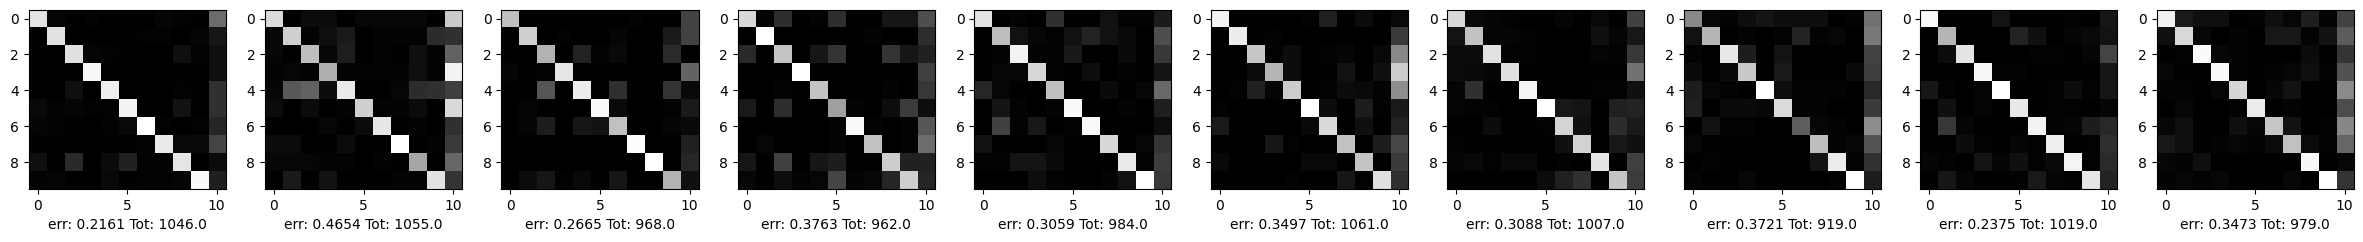

In [75]:

# plot n different plots

fig, axs = plt.subplots(1,10)  # 1 row, 2 columns, first plot
fig.set_figheight(10)

fig.set_figwidth(30)

tot_negatives = 0

for i in range(10):    

    true_pos = sum(np.diagonal(list_all[i]))
    tot = np.sum(list_all[i])
    false_negative = tot - true_pos

    ## majority voting for each class
    bt = np.argmax(list_all[i], axis=0)

    ct = np.zeros((10,11), dtype=np.bool_)
    for x in range(10):    
        ct[bt[x]][x] = True   

    # axs[1][i].set_xlabel("False negatives: {} ".format(false_negative))
    # axs[1][i].imshow(ct, cmap='Greys_r')

    tot_negatives += false_negative
    print(tot_negatives)

    axs[i].set_xlabel("err: {:.4f} Tot: {}".format(false_negative/tot, tot))
    axs[i].imshow(list_all[i], cmap='Greys_r')

print("final test accuracy: ", 1-(tot_negatives/10000) )

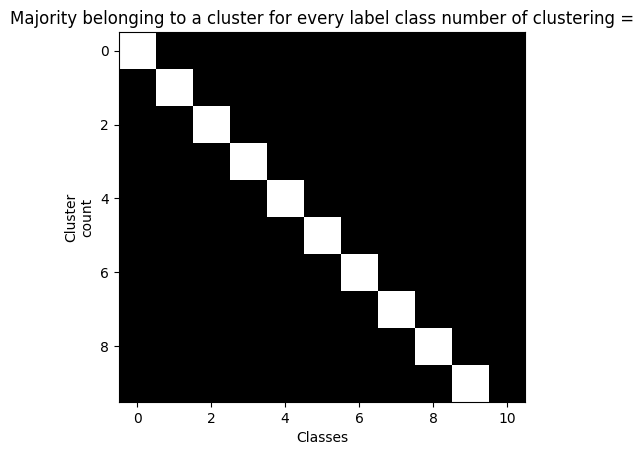

In [77]:
## majority voting for each class
bt = np.argmax(at, axis=0)

ct = np.zeros((10,11))
for x in range(10):    
    ct[bt[x]][x] = 1

plt.xlabel("Classes")
plt.ylabel("Cluster\ncount")
plt.title("Majority belonging to a cluster for every label class number of clustering =")
plt.imshow(ct, cmap='Greys_r')

In [78]:
print(centroids)

[[ 1.2200778   0.35155034  0.14543827 ...  1.8693928  -1.746993
   0.43573877]
 [ 1.6846068  -1.4774454   0.2211549  ... -0.2947296   0.09786692
   0.371074  ]
 [ 0.5319949   0.40697405  0.14861241 ...  1.5530319  -1.6535947
  -0.58409303]
 ...
 [-2.2031183  -0.00956561  0.19221461 ... -1.1112419   0.24671137
  -1.0315042 ]
 [-2.8705158   0.06887716  0.19313903 ...  1.9522929  -0.9103775
  -0.7863662 ]
 [ 1.711165   -1.1348513   0.19063242 ...  1.0703391  -0.47288743
   0.18520766]]


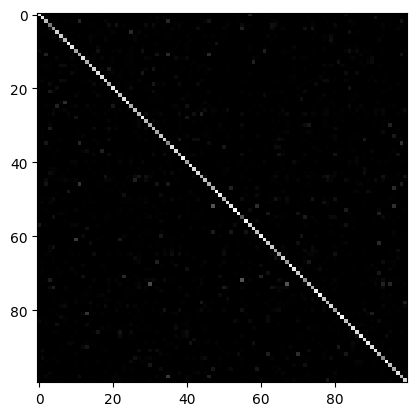

In [79]:

a = np.zeros((100,100))

for i, x in enumerate(embeddings_test):
    distances = np.linalg.norm(centroids - x, axis=1)
    first_index = np.argsort(distances)[0]    
    a[first_index][y_test[i]] += 1

plt.imshow(a, cmap='Greys_r')



In [80]:
true_pos = sum(np.diagonal(a))
tot = np.sum(a)
false_negative = tot - true_pos

print(false_negative/tot)
print(1-false_negative/tot)

0.3244
0.6756
